In [1]:
from ipynb.fs.full.interpolation_functions import *
import intake
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
cat = intake.open_catalog("https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml")

Interpolate fesom output from triangular unstructured mesh to quadrilateral regular mesh with stereographic northpolar projection and save it as nc file

In [3]:
data = cat['dkrz.disk.model-output.ifs-fesom2-sr.eerie-control-1950.ocean.native']['daily'].to_dask()

In [4]:
grid = cat['dkrz.disk.model-output.ifs-fesom2-sr.eerie-control-1950.ocean.native']['node_grid'].to_dask()
model_lon = grid.grid_center_lon.values
model_lat = grid.grid_center_lat.values
model_lon = np.where(model_lon>180, model_lon-360, model_lon)

In [5]:
# the data object contains data from 1950-01-01 to 1956-12-31. set
# startday and ntimesteps accordingly

ntimesteps = 365
startday = 0
a_ice = data.a_ice
u_ice = data.uice
v_ice = data.vice

In [6]:
%%time
# interpolate data from unstructured grid to regular grid
# in north polar stereographic projection
do_everything(a_ice, u_ice, v_ice, model_lon, model_lat,
              ntimesteps, startday, 'data/ice_fesom_1950.nc'
             )

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
CPU times: user 21.7 s, sys: 20.2 s, total: 41.9 s
Wall time: 3min 17s


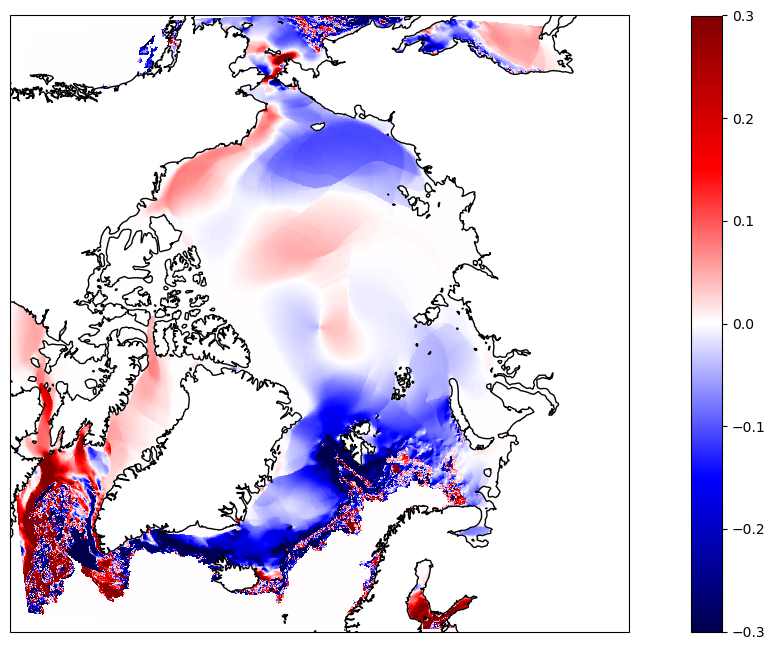

In [8]:
# plot the interpolated data
test = xr.open_dataset('data/ice_fesom_1950.nc')

fig = plt.figure(figsize=[16, 8])
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines(zorder=3)
im = ax.pcolormesh(test.ULON, test.ULAT,
                   test.U.isel(time=30),
                   cmap = 'seismic',
                   vmin=-0.3, vmax=0.3,
                   transform=ccrs.PlateCarree())
plt.colorbar(im)